# Jaka Rizmal

Gručenje držav glede na podobnost rasti okuženih za Covid-19.

In [1]:
import pandas as pd

# Reading data
dataFrame = pd.read_table("../podatki/corona_latest.csv",sep=",",usecols=[0,4,5,6,9])

# Converting column to datetime dtype
dataFrame["dateRep"] = pd.to_datetime(dataFrame["dateRep"],format= "%d/%m/%Y")

# Extracting min and max dates
dateMin = dataFrame["dateRep"].min()
dateMax = dataFrame["dateRep"].max()

In [2]:
# Creating a weekly date range
dateRange = pd.date_range(dateMin,dateMax,freq="W")

# Getting all countries
countries = dataFrame["countriesAndTerritories"].unique()

In [3]:
weeklyStats = dict()

# Iterate through countries and calculate weekly cases and deaths
for currentCountry in countries:
    weeklyStats[currentCountry] = []
    rows = dataFrame[dataFrame["countriesAndTerritories"]==currentCountry]
    for i in range(len(dateRange)):
        if i >= len(dateRange)-1:
            break
        # Select rows between this and next dateRange item
        week = rows[(rows["dateRep"]>=dateRange[i])&(rows["dateRep"]<dateRange[i+1])]
        # Iterate through weeks and sum cases and deaths, add to weeklyStats
        weeklyStats[currentCountry].append([week["cases"].sum(),week["deaths"].sum()])    

In [4]:
weeklyCoefs = dict()

# Calculate growth coefficients between weeks
for country in weeklyStats.keys():
    weeks = weeklyStats[country]
    casesCoefs = []
    deathsCoefs = []
    for i in range(len(weeks)):
        if i>=len(weeks)-1:
            break
        if weeks[i][0]==0:
            casesCoefs.append(0)
        else:
            casesCoefs.append(weeks[i+1][0]/weeks[i][0])
        if weeks[i][1] == 0:
            deathsCoefs.append(0)
        else:
            deathsCoefs.append(weeks[i+1][1]/weeks[i][1])
    weeklyCoefs[country]=[]
    weeklyCoefs[country].append(casesCoefs)
    weeklyCoefs[country].append(deathsCoefs)

In [15]:
import random
random.seed(66)
# labels = random.sample(list(weeklyCoefs.keys()),100)
labels = weeklyCoefs.keys()

caseMatrix = []
deathMatrix = []

# Create a matrix of coefficients
for country in labels:
    caseMatrix.append(weeklyCoefs[country][0])
    deathMatrix.append(weeklyCoefs[country][1])
    
labels = list(weeklyCoefs.keys())

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Create clustering model
linkage = sch.linkage(caseMatrix, method="weighted")
# plt.figure(figsize=(45, 15))

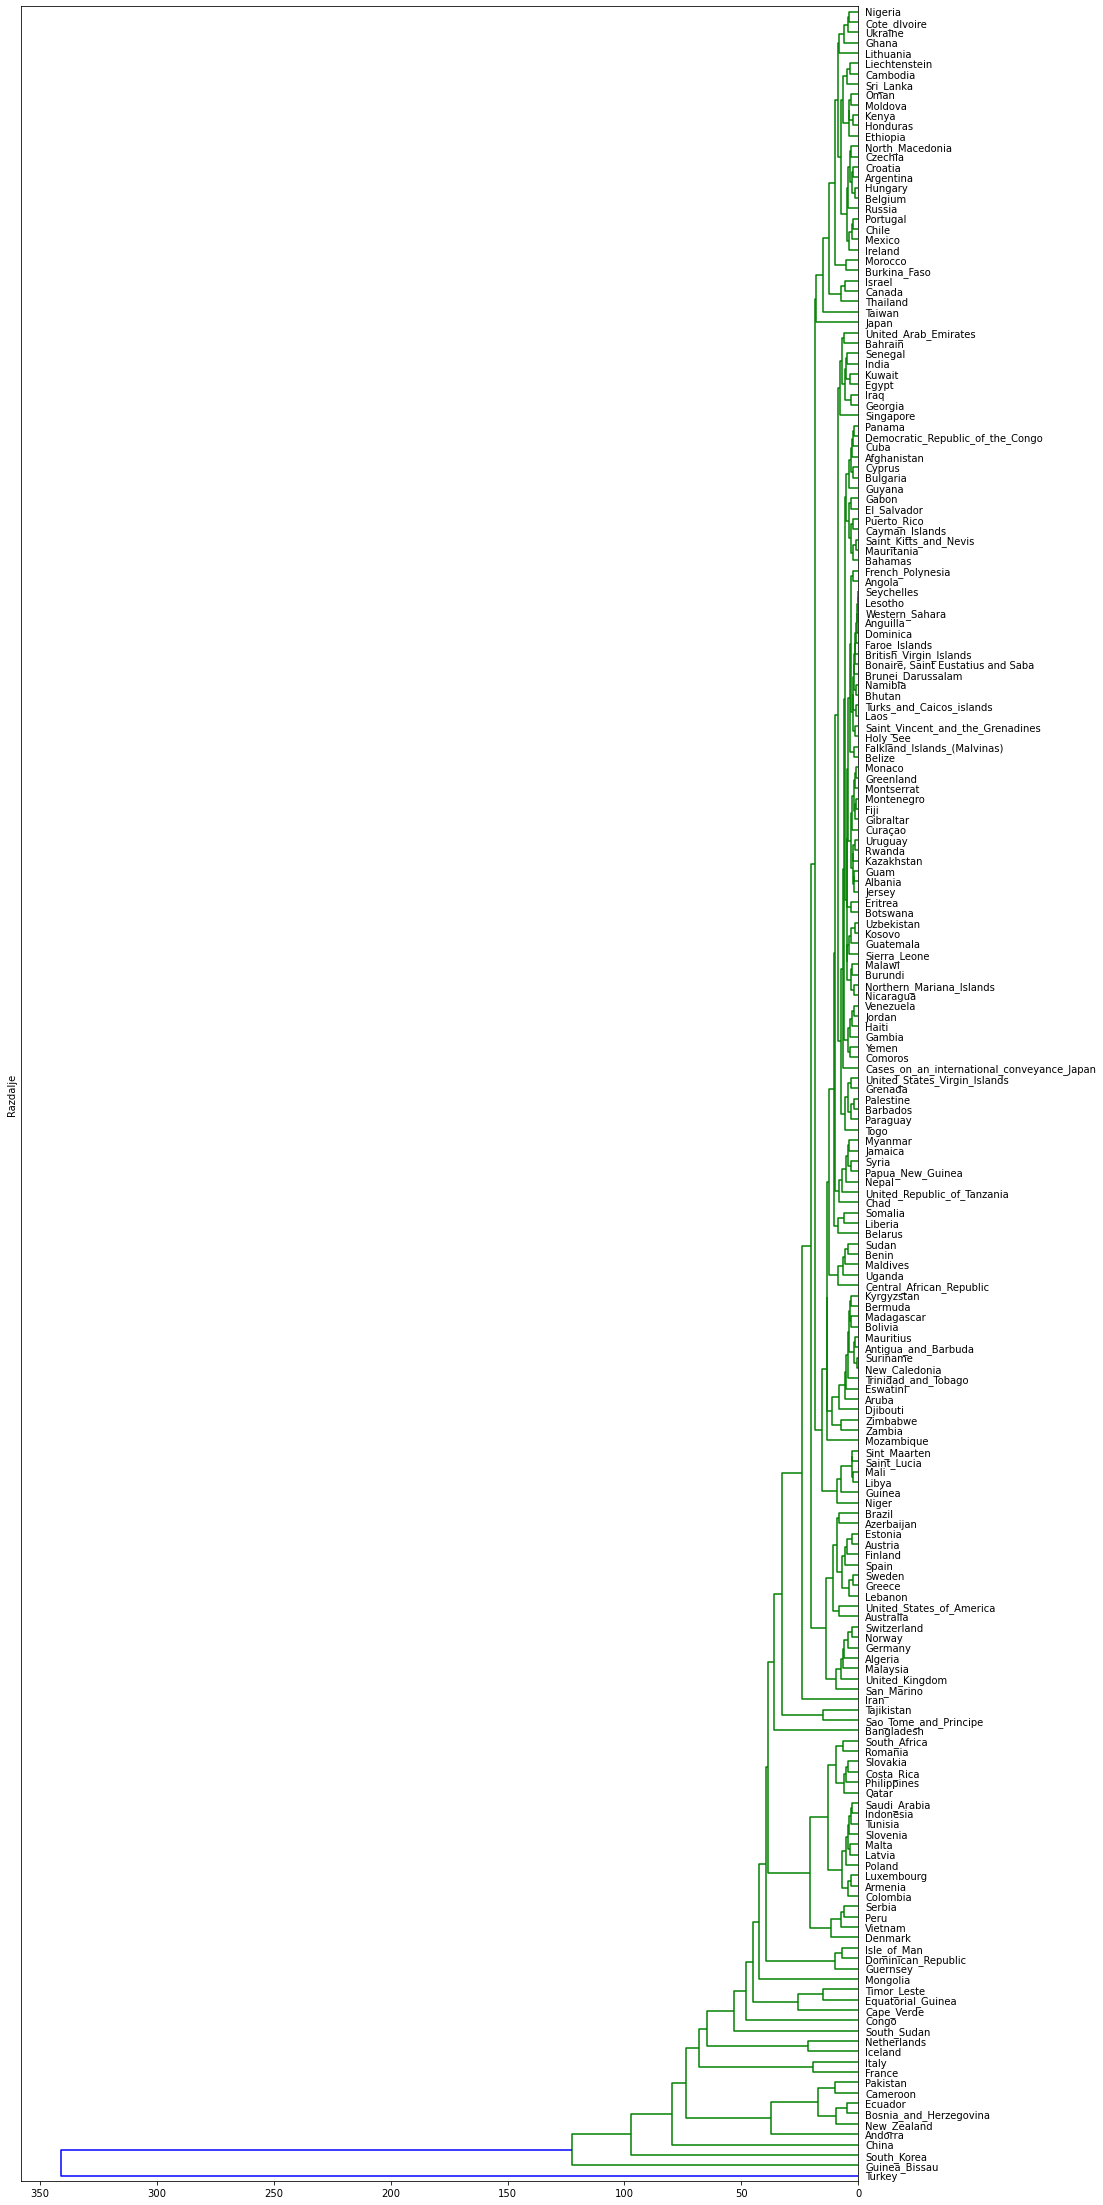

In [30]:
plt.figure(figsize=(15, 40))
dendogram = sch.dendrogram(linkage, labels=labels,orientation="left", leaf_font_size=10)
# plt.plot([0, 100], [t, t], "k--")
plt.ylabel("Razdalje")
plt.show()

## Gručenje glede na smrti

Gručim države za leto 2015. Parametri: smrtnost v smrti/milijon za vsak mesec v letu

In [56]:
# Load country population for year 2015
dataFrame = pd.read_table("../podatki/total_population_by_sex.csv",sep=",",usecols=[1,4,8])
dataFrame = dataFrame[(dataFrame["Time"]==2015)]

# Location,Time,PopTotal

In [57]:
# PopTotal je v čudni obliki float v tisočih, zato ga množim s 1000 in dam v integer
dataFrame["PopTotal"]=dataFrame["PopTotal"]*1000
pd.to_numeric(dataFrame["PopTotal"],downcast="signed")
# dataFrame["PopTotal"]=dataFrame["PopTotal"].astype(long)

65        3.441360e+07
949       1.182439e+09
1833      1.180803e+09
1984      1.181330e+09
2135      1.364789e+08
              ...     
277310    7.379797e+09
278194    6.143091e+09
278345    2.649788e+07
279229    1.587937e+07
280113    1.381464e+07
Name: PopTotal, Length: 477, dtype: float64

In [71]:
def getCountryPopulation(year,country):
    dataFrame = pd.read_table("../podatki/total_population_by_sex.csv",sep=",",usecols=[1,4,8])
    dataFrame = dataFrame[(dataFrame["Time"]==year)]
    dataFrame["PopTotal"]=dataFrame["PopTotal"]*1000
    pd.to_numeric(dataFrame["PopTotal"],downcast="signed")
    return dataFrame[dataFrame["Location"]==country]
    

In [72]:
getCountryPopulation(2015,"Slovenia")

,Location,Time,PopTotal
224805,Slovenia,2015,2071199.0
